/home/laurens/anaconda3/envs/VPint2/lib/python3.12/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


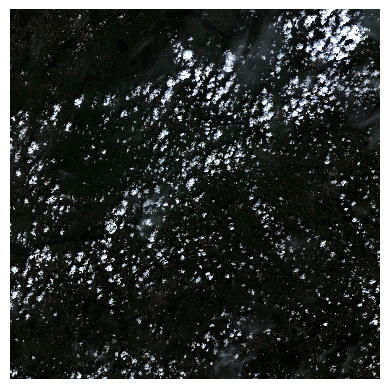

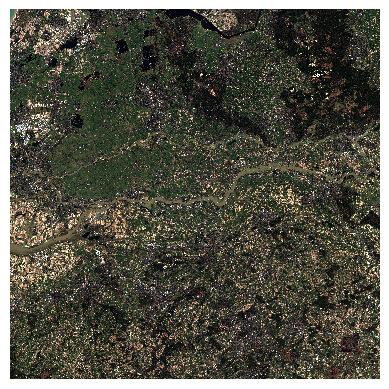

In [3]:
from VPint.VPint2 import VPint2_interpolator
from VPint.utils.EO_utils import load_product, load_product_windowed, normalise_and_visualise, normalise_and_visualise_single

target_path = "/mnt/c/Users/laure/Downloads/S2A_MSIL2A_20240718T105031_N0510_R051_T31UFT_20240718T144450.SAFE.zip"
features_path = "/mnt/c/Users/laure/Downloads/S2A_MSIL2A_20240110T105421_N0510_R051_T31UFT_20240110T151449.SAFE.zip"

target = load_product(target_path)
features = load_product(features_path)

normalise_and_visualise(target)
normalise_and_visualise(features)

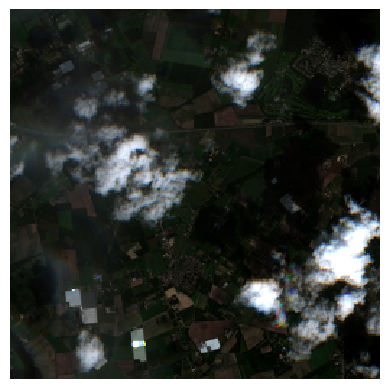

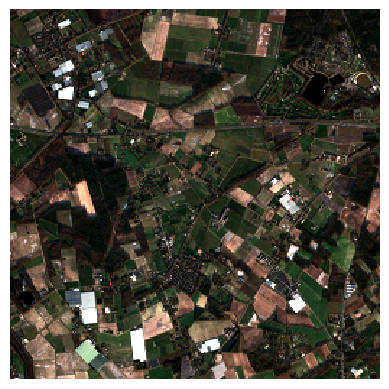

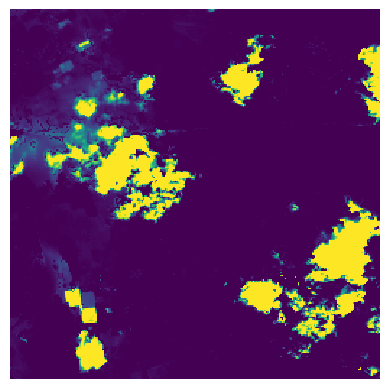

In [4]:
# 256 x 256 patch
y_size = 256
x_size = 256
# Offsets to just read at the top-right of the image
y_offset = 20
x_offset = 20

# Perform the windowed data loading
target = load_product_windowed(target_path, y_size, x_size, y_offset, x_offset)
features = load_product_windowed(features_path, y_size, x_size, y_offset, x_offset)

# Also load a cloud mask included in the data product
mask = load_product_windowed(target_path, y_size, x_size, y_offset, x_offset, keep_bands=["CLD"], bands_20m={"CLD":0})[:,:,0]

# Visualise
normalise_and_visualise(target)
normalise_and_visualise(features)
normalise_and_visualise_single(mask, percentile_clip=False)

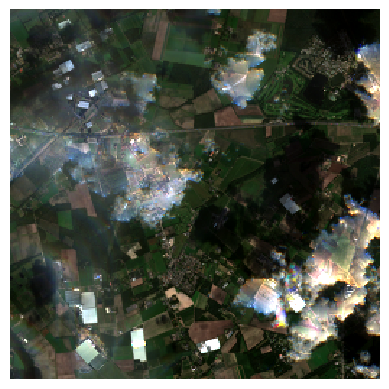

In [5]:
VPint2 = VPint2_interpolator(target, features, mask=mask, bands_first=False, threshold=10) # Set bands_first to True if your data is C x H x W instead of H x W x C
pred = VPint2.run()

normalise_and_visualise(pred)

/home/laurens/anaconda3/envs/VPint2/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


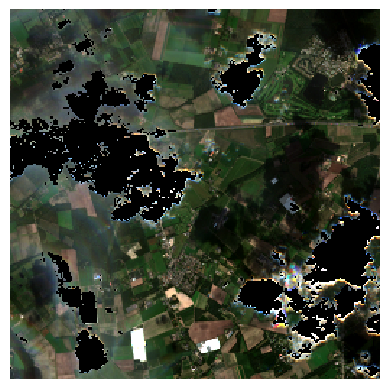

In [6]:
VPint2 = VPint2_interpolator(target, features, mask=mask, bands_first=False, threshold=10)
normalise_and_visualise(VPint2.target)

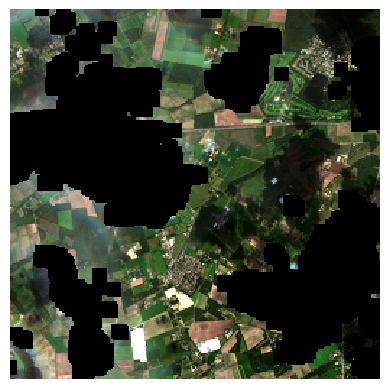

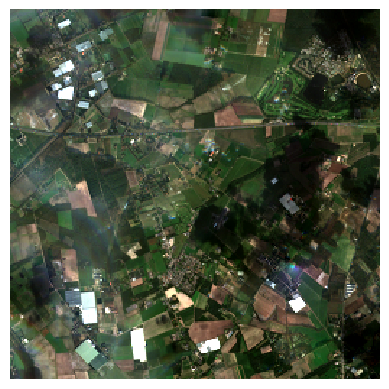

In [7]:
VPint2 = VPint2_interpolator(target, features, mask=mask, buffer_mask=True, mask_buffer_size=5, bands_first=False, threshold=10) 
normalise_and_visualise(VPint2.target) # Visualise the buffered mask
pred = VPint2.run() # Run the algorithm

normalise_and_visualise(pred)

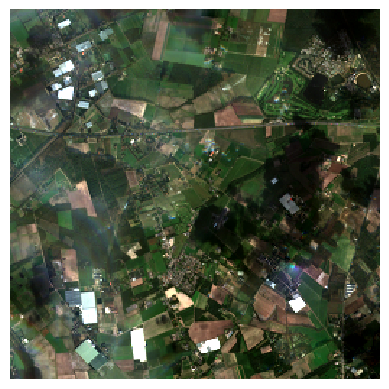

In [8]:
VPint2 = VPint2_interpolator(target, features, mask=mask, buffer_mask=True, mask_buffer_size=5, bands_first=False, threshold=10) 
# Run the algorithm with automatically configured extensions
pred = VPint2.run(resistance=True, prioritise_identity=True, clip_val=10000,
                    auto_adapt=True, auto_adaptation_epochs=10, auto_adaptation_max_iter=100, auto_adaptation_strategy='random', auto_adaptation_proportion=0.8)

normalise_and_visualise(pred)